<a href="https://colab.research.google.com/github/RicardoUrrutia-Tech/HR_Project/blob/main/Departamento_de_Gesti%C3%B3n_del_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Recursos Humanos (HR Analytics)

## Introducción

Este proyecto de **HR Analytics** tiene como propósito analizar la información de empleados de una organización con el fin de obtener **insights estratégicos** relacionados los factores que pueden influir en la permanencia de los colaboradores.

El análisis permitirá identificar patrones clave que apoyen la toma de decisiones en **gestión del talento** y **retención de empleados**.

---

## Descripción del dataset

El dataset utilizado contiene información detallada de cada empleado, incluyendo variables demográficas, laborales, salariales y de satisfacción. Entre las principales columnas se encuentran:

- **EmpID**: Identificador único de cada empleado  
- **Age**: Edad del empleado  
- **AgeGroup**: Grupo etario al que pertenece el empleado  
- **Attrition**: Estado de rotación (si el empleado renunció o sigue activo)  
- **BusinessTravel**: Frecuencia de viajes de negocios  
- **DailyRate**: Tasa diaria de pago  
- **Department**: Departamento donde trabaja el empleado  
- **DistanceFromHome**: Distancia en millas entre el hogar y el lugar de trabajo  
- **Education**: Nivel educativo alcanzado  
- **EducationField**: Área de formación académica  
- **EmployeeCount**: Número total de empleados  
- **EmployeeNumber**: Identificador único del empleado  
- **EnvironmentSatisfaction**: Nivel de satisfacción con el ambiente laboral  
- **Gender**: Género del empleado  
- **HourlyRate**: Tasa horaria de pago  
- **JobInvolvement**: Nivel de involucramiento con el trabajo  
- **JobLevel**: Nivel del cargo  
- **JobRole**: Rol desempeñado dentro de la organización  
- **JobSatisfaction**: Nivel de satisfacción con el trabajo  
- **MaritalStatus**: Estado civil  
- **MonthlyIncome**: Ingreso mensual  
- **SalarySlab**: Categoría de ingresos  
- **MonthlyRate**: Pago mensual estandarizado  
- **NumCompaniesWorked**: Número de compañías previas donde trabajó el empleado  
- **Over18**: Indicador si el empleado es mayor de edad  
- **OverTime**: Indicador si el empleado realiza horas extra  
- **PercentSalaryHike**: Porcentaje de incremento salarial  
- **PerformanceRating**: Evaluación de desempeño  
- **RelationshipSatisfaction**: Satisfacción con las relaciones laborales  
- **StandardHours**: Horas estándar de trabajo  
- **StockOptionLevel**: Nivel de beneficios en acciones  
- **TotalWorkingYears**: Total de años de experiencia laboral  
- **TrainingTimesLastYear**: Número de capacitaciones en el último año  
- **WorkLifeBalance**: Satisfacción con el balance vida-trabajo  
- **YearsAtCompany**: Años en la empresa actual  
- **YearsInCurrentRole**: Años en el rol actual  
- **YearsSinceLastPromotion**: Años desde la última promoción  
- **YearsWithCurrManager**: Años trabajando con el jefe actual  

---

## Objetivo del análisis

- Comprender los factores que influyen en la **rotación de empleados**.  
- Identificar patrones en variables clave como edad, ingresos, desempeño y satisfacción.  
- Construir un modelo predictivo básico para anticipar la probabilidad de renuncia.
- Generar visualizaciones que apoyen la toma de decisiones en gestión de personas.

# Importar las librerías y datasets


In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# Deep Learning
import tensorflow as tf

In [2]:
# Comandos para montar el disco
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Enlace completo al archivo csv que contiene el conjunto de datos
employee_df = pd.read_csv('/content/drive/MyDrive/Proyectos Data Science Portafolio/Human_Resources.csv')

In [4]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# VISUALIZACIÓN DEL DATASET

In [7]:
# Reemplazamos las columnas 'Attritition', "BusinessTravel" y 'Overtime' por enteros antes de poder llevar a cabo cualquier visualización
employee_df['Attrition'] = employee_df['Attrition'].replace({'No': 0, 'Yes': 1}).astype(int)
employee_df['OverTime'] = employee_df['OverTime'].replace({'No': 0, 'Yes': 1}).astype(int)
employee_df

/tmp/ipython-input-503374554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  employee_df['Attrition'] = employee_df['Attrition'].replace({'No': 0, 'Yes': 1}).astype(int)
/tmp/ipython-input-503374554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  employee_df['OverTime'] = employee_df['OverTime'].replace({'No': 0, 'Yes': 1}).astype(int)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Axes: >

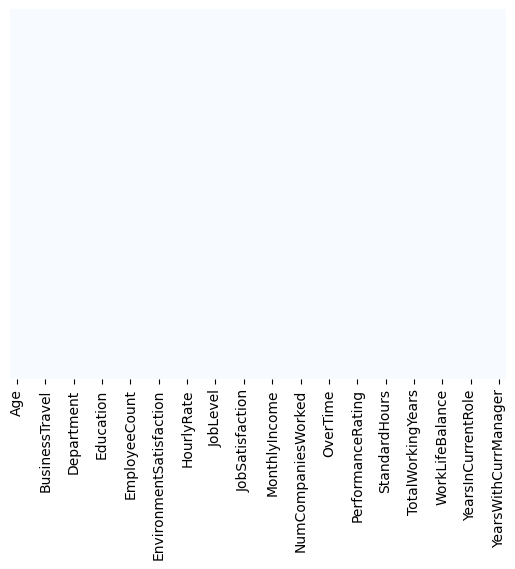

In [8]:
# Ver si faltan datos
sns.heatmap(employee_df.isnull(), cbar=False, yticklabels=False, cmap='Blues')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'c

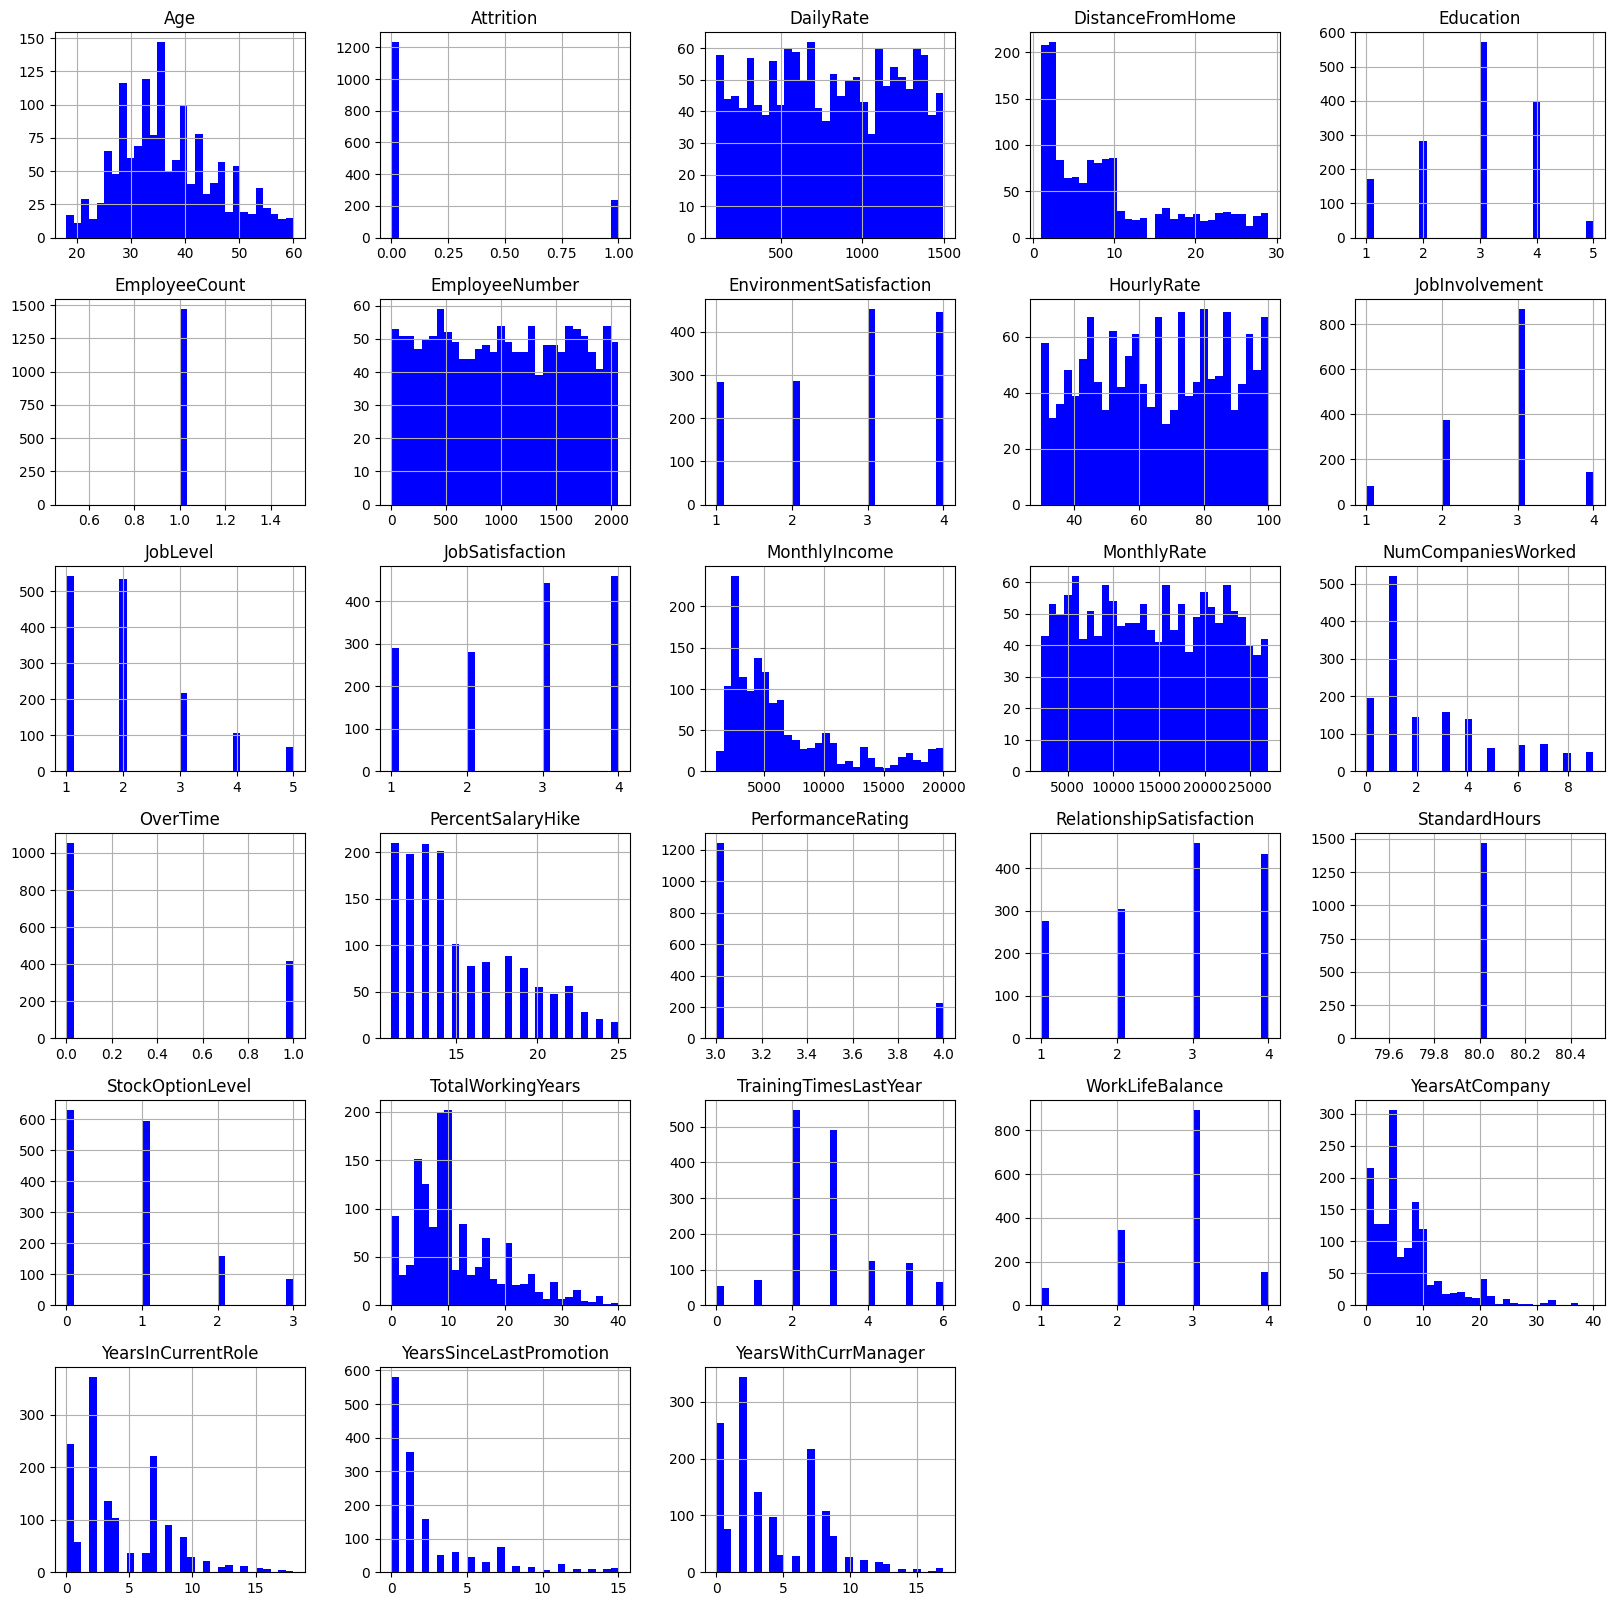

In [9]:
employee_df.hist(bins=30, figsize=(20,20), color='b')
# Algunas características como 'MonthlyIncome' y 'TotalWorkingYears' tienen una distribución con una cola muy larga (long tail distribution)
# Tiene sentido que nos desagamos de 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro

In [10]:
# Tiene sentido deshacerse de 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro
# Eliminemos 'EmployeeNumber' también, ya que es el ID y no aporta valor.
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [11]:
# Ver cuántos empleados dejan la empresa
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [55]:
# Total
print(f"Total = {len(employee_df)}")

# Tabla con estilos
tabla_attrition.style \
    .format({'Porcentaje': '{:.2f}%'}) \
    .set_caption("Distribución de empleados por Permanencia") \
    .background_gradient(cmap="Blues")

Total = 1470


,Count,Percentage
Attrition,,
0,1233,83.880000
1,237,16.120000


In [13]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


## Comparación: Media y Error Estándar entre empleados que se quedaron y los que se fueron

- **Age**: la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron.  
- **DailyRate**: el rate diario de los empleados que se quedaron es mayor.  
- **DistanceFromHome**: los empleados que se quedan viven más cerca del trabajo.  
- **EnvironmentSatisfaction** & **JobSatisfaction**: los empleados que se quedan están, en general, más satisfechos con sus trabajos.  
- **StockOptionLevel**: los empleados que se quedan tienen un mayor nivel de *stock options*.  

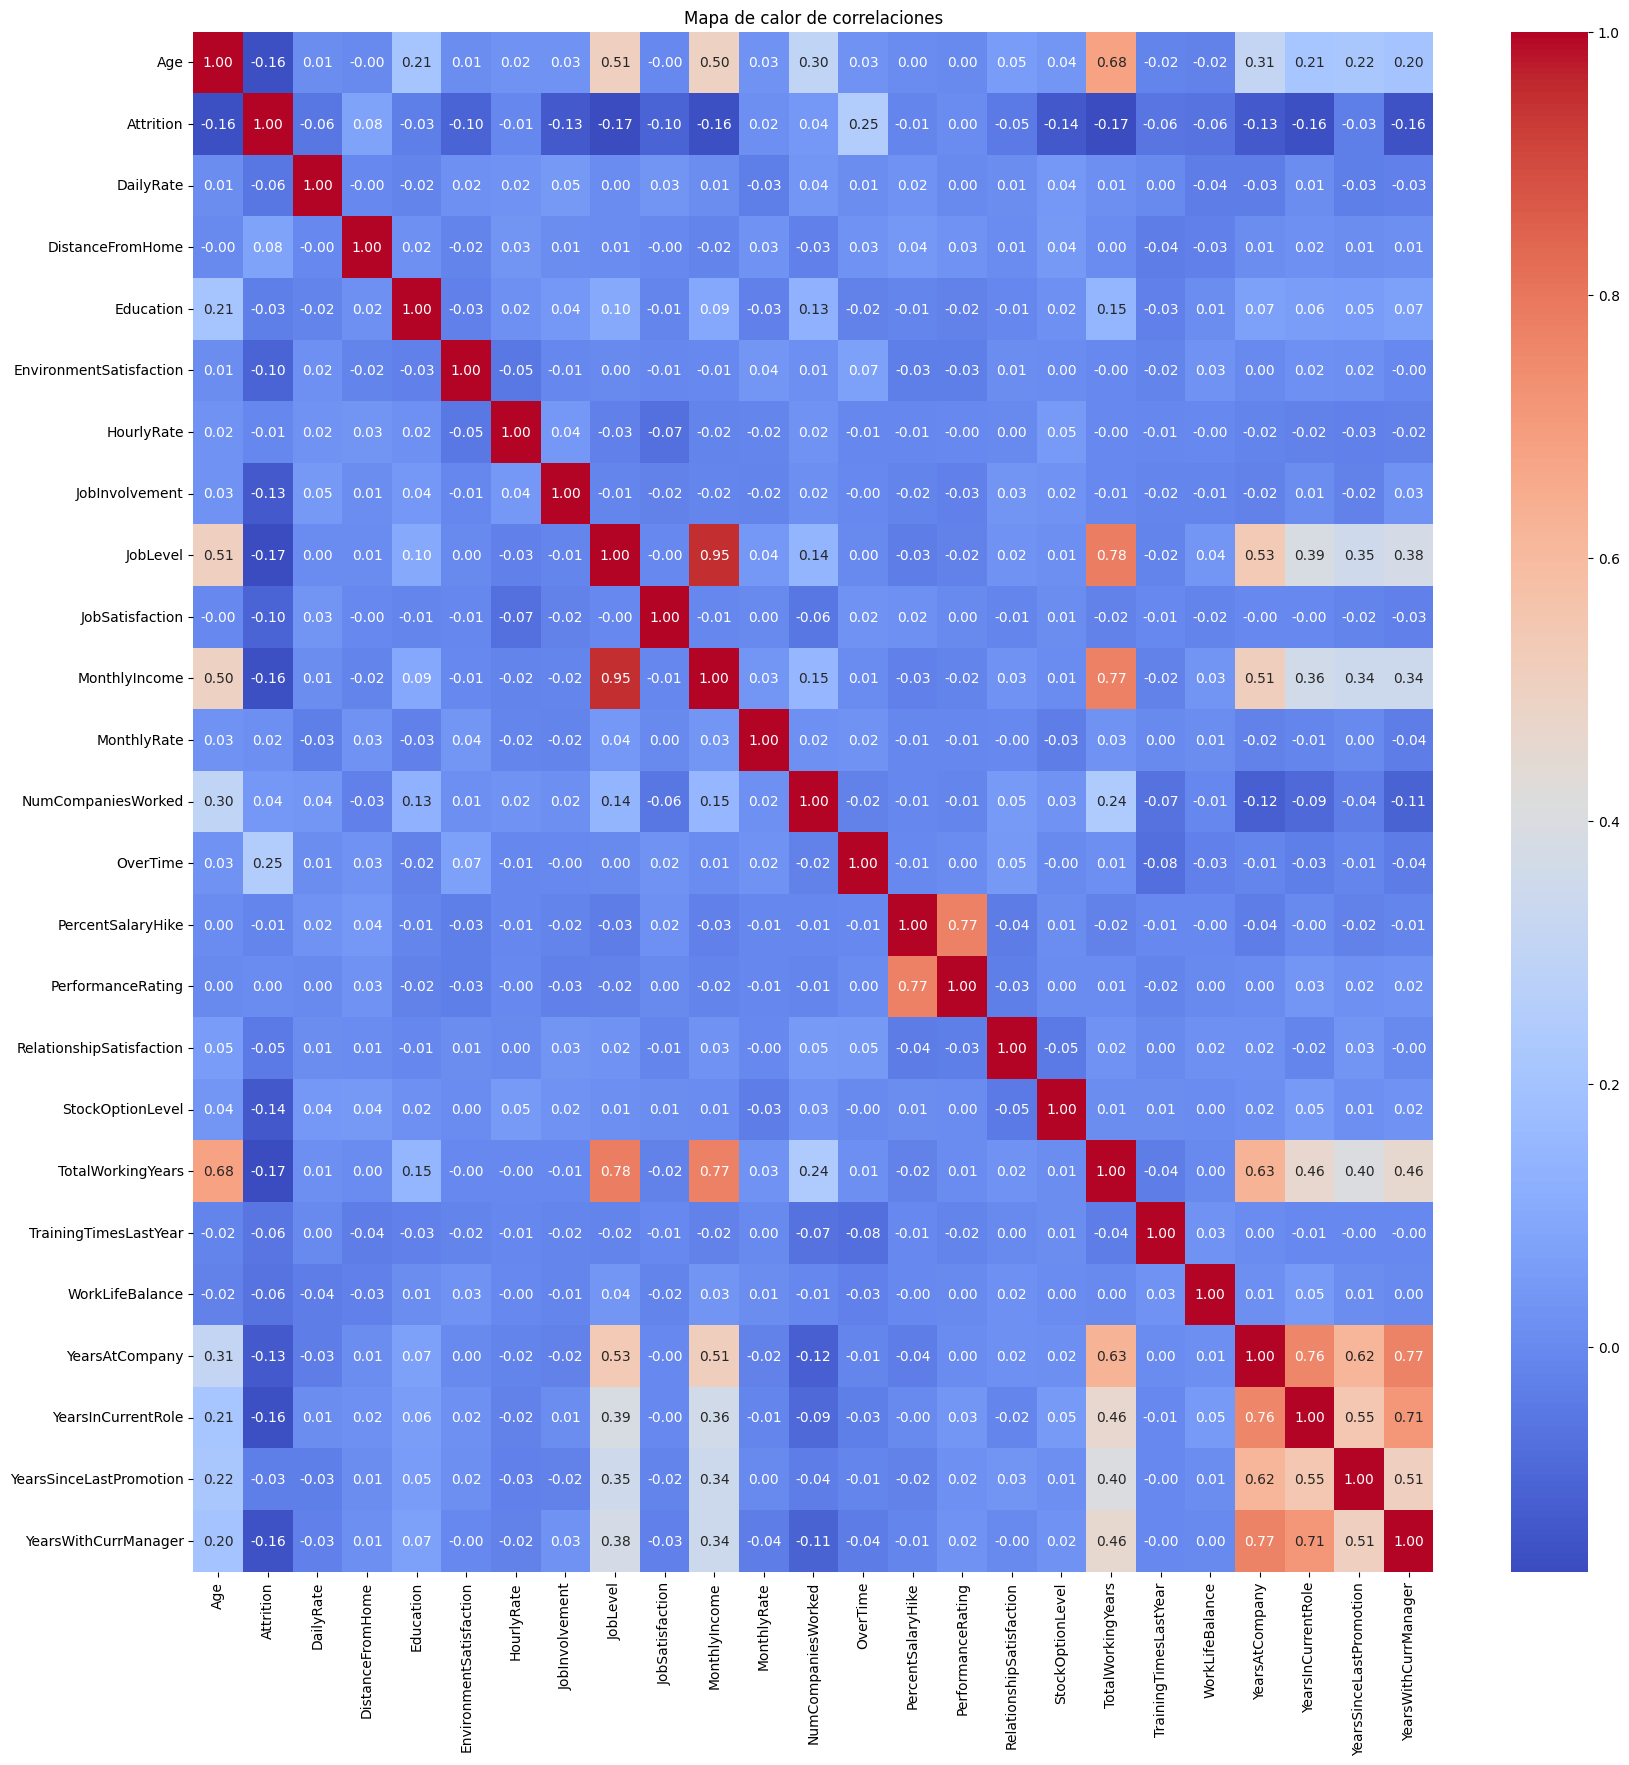

In [15]:
# Correlation matrix
corr = employee_df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

Relaciones y correlaciones destacadas

- **Job Level** está altamente correlacionado con el número total de horas de trabajo.  
- **Monthly Income** está altamente correlacionado con **Job Level**.  
- **Monthly Income** está altamente correlacionado con el número total de horas de trabajo.  
- **Age** está altamente correlacionado con los ingresos mensuales.  
- **PerformanceRaiting** está altamente correlacionado con el porcentaje de aumento salarial.  

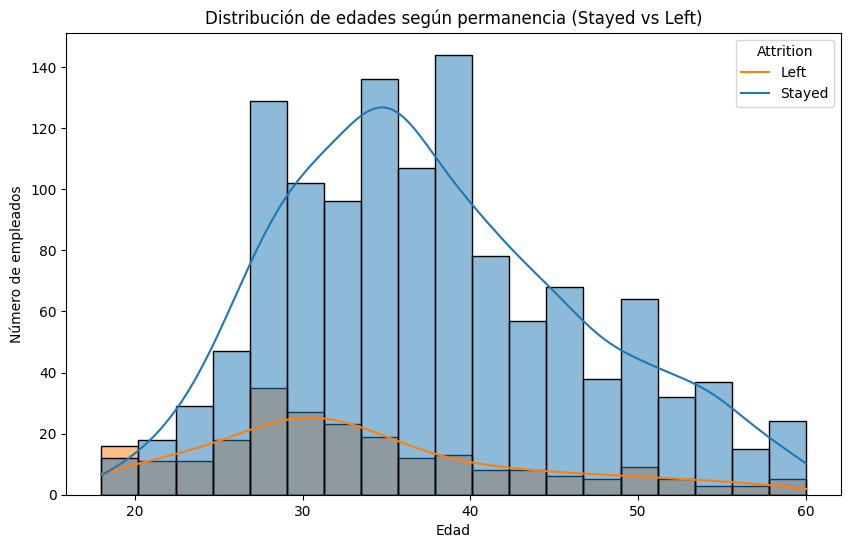

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_df, x='Age', hue='Attrition', kde=True)

plt.title("Distribución de edades según permanencia (Stayed vs Left)")
plt.xlabel("Edad")
plt.ylabel("Número de empleados")

# Cambiar etiquetas de la leyenda
plt.legend(title="Attrition", labels=["Left","Stayed"])
plt.show()

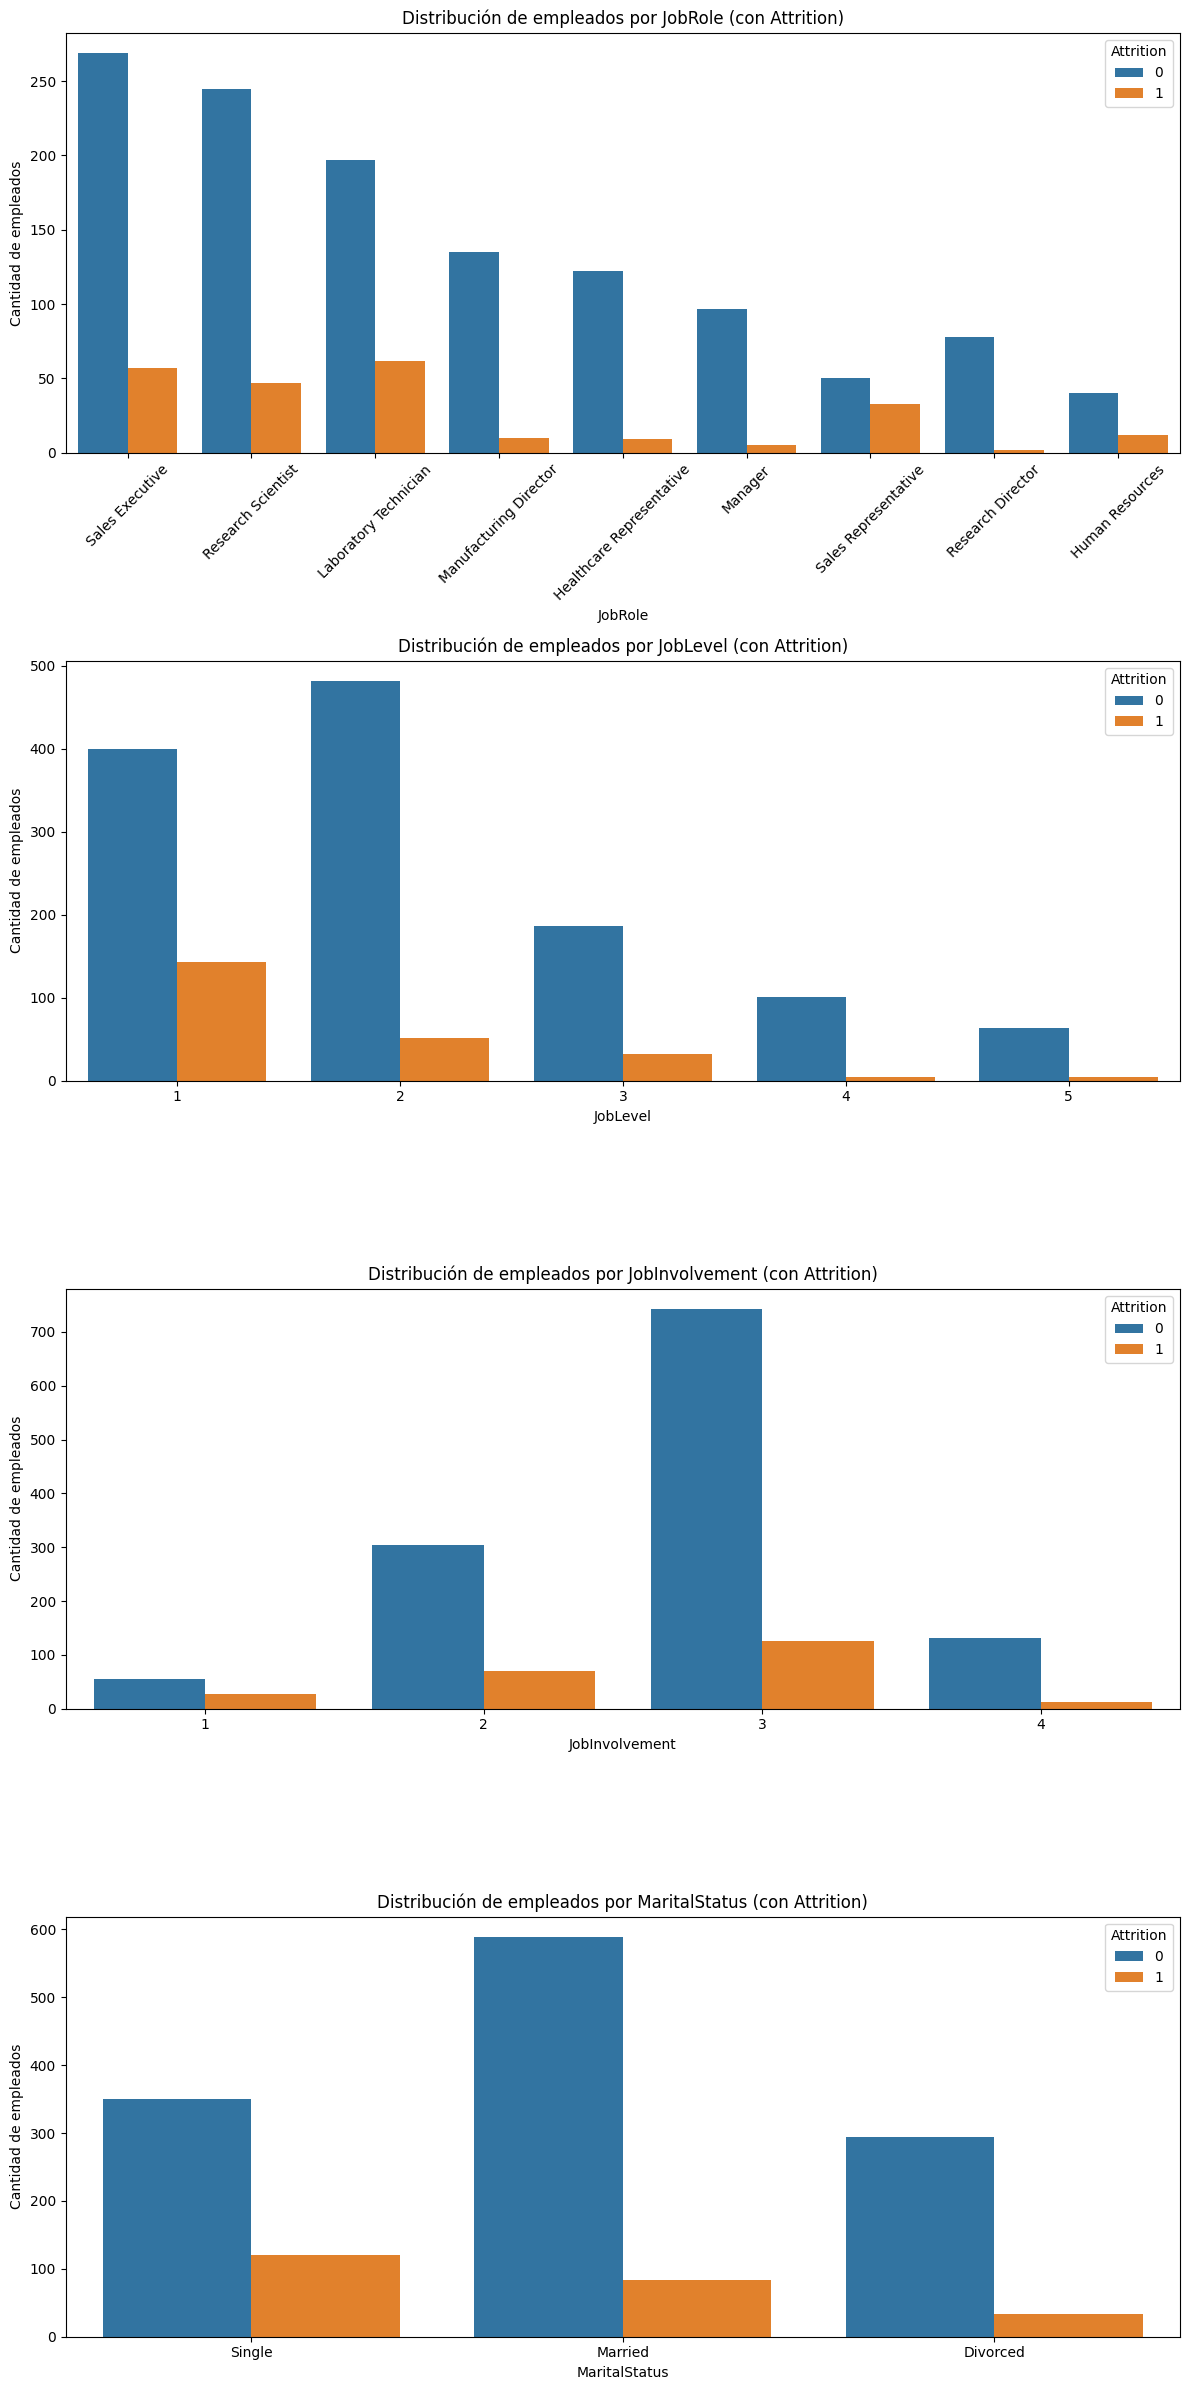

In [18]:
# Variables categóricas a comparar
cat_vars = ["JobRole", "JobLevel", "JobInvolvement", "MaritalStatus"]

# Crear 4 gráficos, distribuidos en 4 filas y 1 columna
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

for i, var in enumerate(cat_vars):
    sns.countplot(data=employee_df, x=var, hue="Attrition", ax=axes[i])
    axes[i].set_title(f"Distribución de empleados por {var} (con Attrition)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Cantidad de empleados")

    # Rotar etiqueta de la variable es JobRole
    if var == "JobRole":
        axes[i].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

In [19]:
# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro trabajo
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

Text(0, 0.5, 'Densidad')

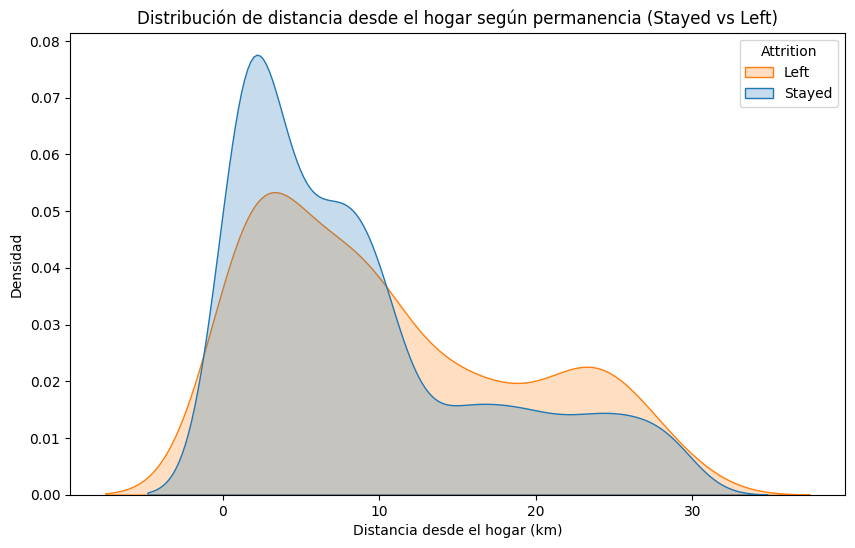

In [20]:
# Visualizamos cómo afecta la distancia desde el hogar del empleado (atributo "DistanceFromHome")
# a la permanencia en el cargo "Attrition"

plt.figure(figsize=(10,6))
sns.kdeplot(data=employee_df, x='DistanceFromHome', hue='Attrition', fill=True, common_norm=False)

plt.title("Distribución de distancia desde el hogar según permanencia (Stayed vs Left)")
plt.legend(title="Attrition", labels=["Left","Stayed"])
plt.xlabel("Distancia desde el hogar (km)")
plt.ylabel("Densidad")

Text(0, 0.5, 'Densidad')

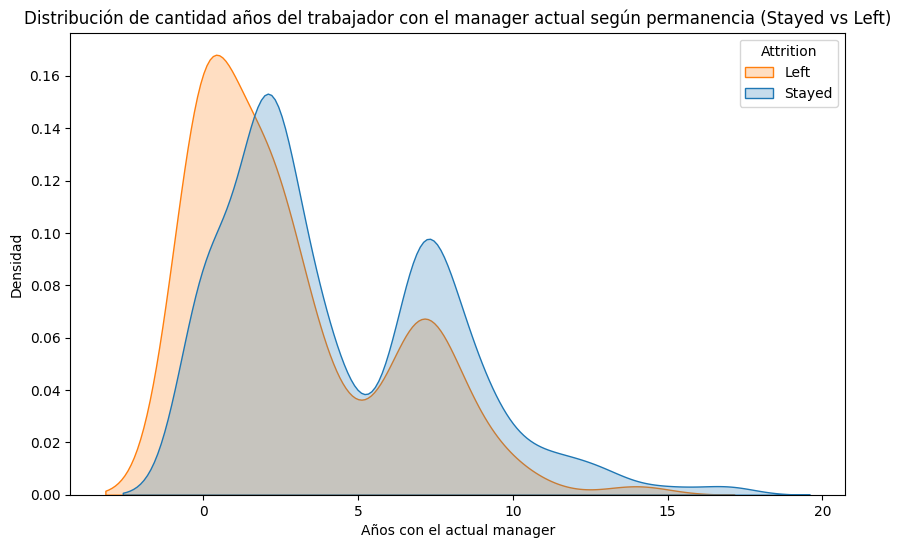

In [21]:
# Visualizamos cómo afecta la cantidad años del trabajador con su manager actual (atributo "YearsWithCurrManager")
# a la permanencia en el cargo "Attrition"

plt.figure(figsize=(10,6))
sns.kdeplot(data=employee_df, x='YearsWithCurrManager', hue='Attrition', fill=True, common_norm=False)

plt.title("Distribución de cantidad años del trabajador con el manager actual según permanencia (Stayed vs Left)")
plt.legend(title="Attrition", labels=["Left","Stayed"])
plt.xlabel("Años con el actual manager")
plt.ylabel("Densidad")

Text(0, 0.5, 'Densidad')

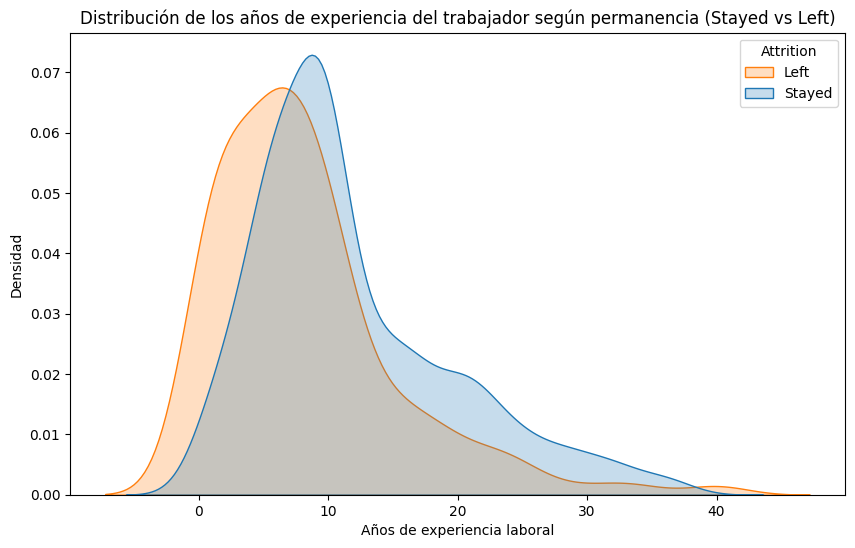

In [22]:
# Visualizamos cómo afectan la cantidad de años experiencia total de empleado (atributo "TotalWorkingYears")
# a la permanencia en el cargo "Attrition"

plt.figure(figsize=(10,6))
sns.kdeplot(data=employee_df, x='TotalWorkingYears', hue='Attrition', fill=True, common_norm=False)

plt.title("Distribución de los años de experiencia del trabajador según permanencia (Stayed vs Left)")
plt.legend(title="Attrition", labels=["Left","Stayed"])
plt.xlabel("Años de experiencia laboral")
plt.ylabel("Densidad")


Text(0, 0.5, 'Ingreso mensual')

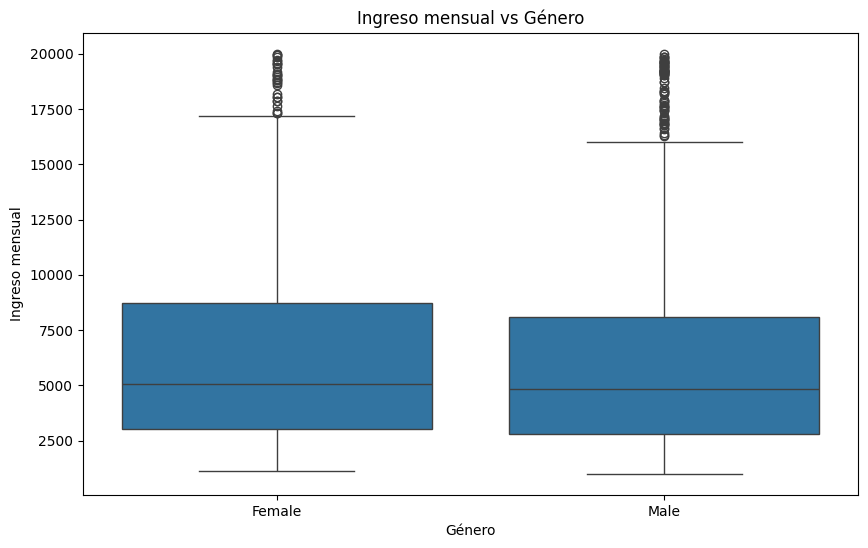

In [23]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(10,6))
sns.boxplot(data=employee_df, x='Gender', y='MonthlyIncome')

plt.title("Ingreso mensual vs Género")
plt.xlabel("Género")
plt.ylabel("Ingreso mensual")

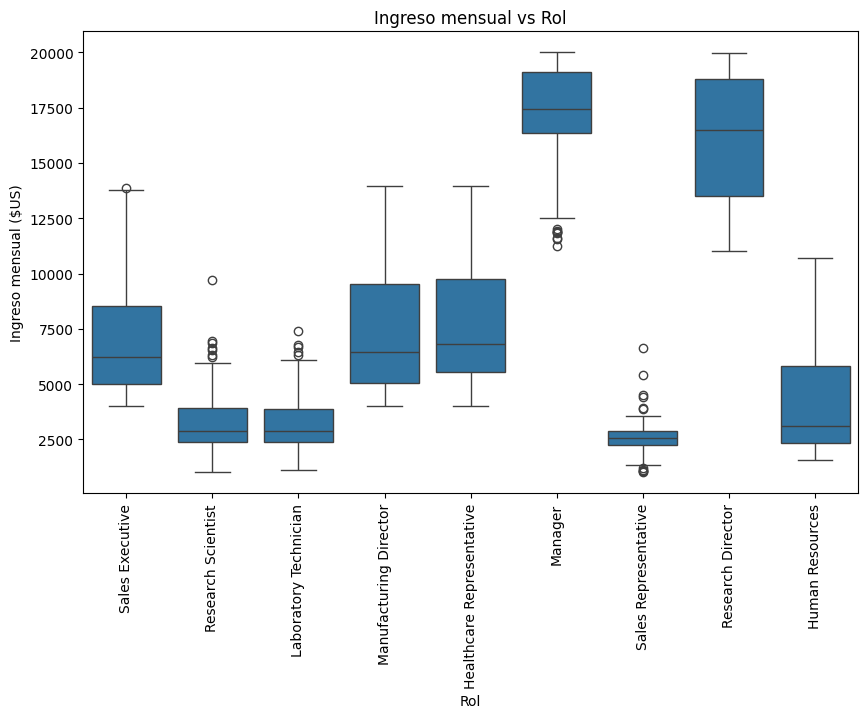

In [24]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(10,6))
sns.boxplot(data=employee_df, x='JobRole', y='MonthlyIncome')

plt.title("Ingreso mensual vs Rol")
plt.xlabel("Rol")
plt.ylabel("Ingreso mensual ($US)")

# Rotar etiquetas del eje X
plt.xticks(rotation=90)

plt.show()

# CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [25]:
# Separamos las variables categóricas:
X_cat=employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [26]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
onehotencoder= OneHotEncoder()
X_cat =onehotencoder.fit_transform(X_cat).toarray()

In [28]:
X_cat.shape

(1470, 26)

In [29]:
X_cat=pd.DataFrame(X_cat)

In [30]:
# Añadimos el resto de atributos, menos el target: 'Atrittion'
X_numerical=employee_df[['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear']]

In [31]:
# Concatenamos los inputs
X=pd.concat([X_cat,X_numerical],axis=1)

In [32]:
X.columns = X.columns.astype(str)

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [33]:
y= employee_df['Attrition']

# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

<Axes: >

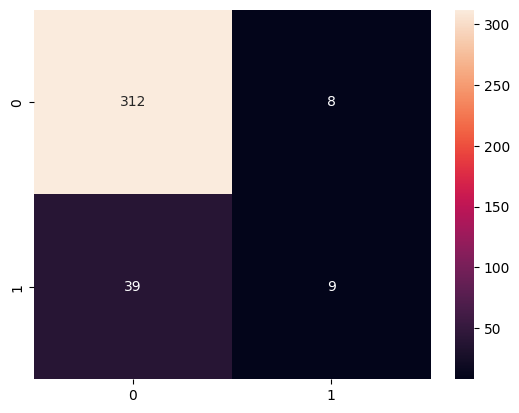

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [37]:
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       320
           1       0.53      0.19      0.28        48

    accuracy                           0.87       368
   macro avg       0.71      0.58      0.60       368
weighted avg       0.84      0.87      0.84       368



# ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [38]:
# Entrenando el modelo de bosques aleatorios
model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

<Axes: >

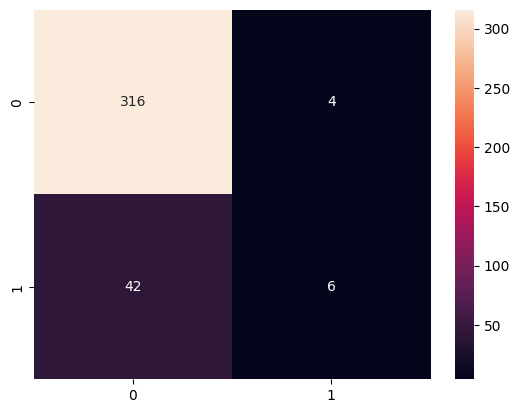

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [40]:
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.60      0.12      0.21        48

    accuracy                           0.88       368
   macro avg       0.74      0.56      0.57       368
weighted avg       0.85      0.88      0.84       368



# ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [41]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        21,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,001 (2.00 MB)

 Trainable params: 523,001 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist=model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7207 - loss: 0.5246
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8395 - loss: 0.3810
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8412 - loss: 0.3675
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8457 - loss: 0.3598
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8633 - loss: 0.3355
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8773 - loss: 0.2928
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8881 - loss: 0.2786
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8996 - loss: 0.2550
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9162 - loss: 0.2191
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9234 - loss: 0.1903
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9255 - loss: 0.1934
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

In [45]:
y_pred=model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [46]:
y_pred =(y_pred>0.5)

In [47]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

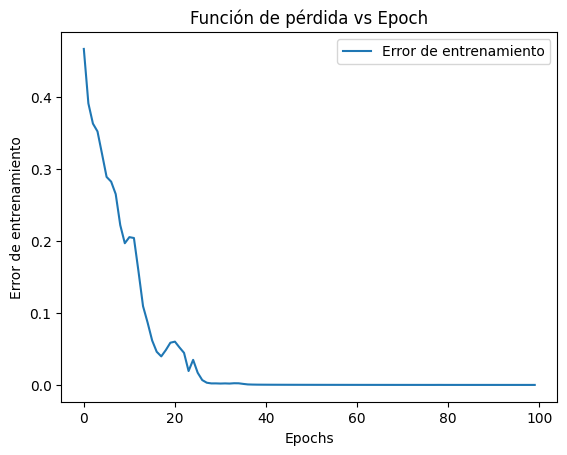

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.title('Función de pérdida vs Epoch')
plt.ylabel('Error de entrenamiento')
plt.xlabel('Epochs')
plt.legend(['Error de entrenamiento'], loc='upper right')
plt.show()

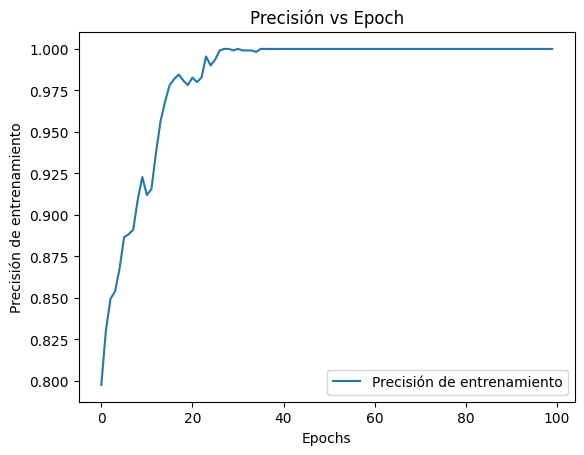

In [49]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Precisión vs Epoch')
plt.ylabel('Precisión de entrenamiento')
plt.xlabel('Epochs')
plt.legend(['Precisión de entrenamiento'], loc='lower right')
plt.show()

<Axes: >

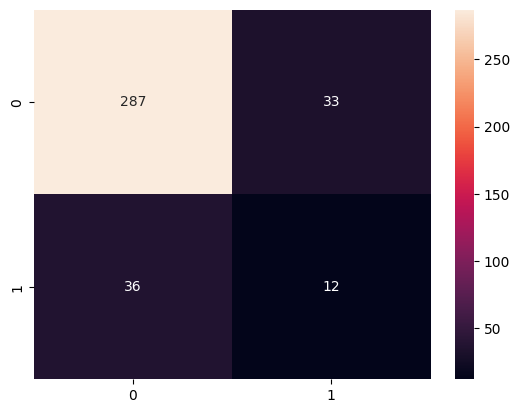

In [50]:
# Resultados en el Conjunto de Testing
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')


In [51]:
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       320
           1       0.27      0.25      0.26        48

    accuracy                           0.81       368
   macro avg       0.58      0.57      0.58       368
weighted avg       0.81      0.81      0.81       368



# Notas

- Todos los modelos tienen un alto sesgo hacia la clase mayoritaria (empleados que se quedan).

- La clase minoritaria (los que se van) es difícil de predecir → el desequilibrio en los datos (320 que se quedan vs. 48 que se van) afecta mucho el rendimiento.

- El modelo que mejor “equilibra” ambas clases es la red neuronal, aunque sacrifica accuracy general.

- Se procederá a mejorar el modelo de redes neuronales, ya que, si bien predice bien quién se queda, lo más importante es predecir quien se va, ya que eso genera costos en la empresa.

# Mejorando el Clasificador de redes neuronales.

In [61]:
# 1. Calcular class weights
# ============================
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Pesos de clases:", class_weights)


Pesos de clases: {0: np.float64(0.6035049288061336), 1: np.float64(2.9153439153439153)}


In [62]:
# 2. Definir el modelo
# ============================
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# 3. Compilar con métricas útiles
# ============================
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)


In [64]:
# 4. Entrenar con early stopping
# ============================
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

epochs_hist = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=50,
    validation_split=0.2,
    callbacks=[callback],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7056 - auc: 0.5322 - loss: 0.6776 - precision: 0.1663 - recall: 0.1993 - val_accuracy: 0.7873 - val_auc: 0.6963 - val_loss: 0.6183 - val_precision: 0.5000 - val_recall: 0.2979
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7521 - auc: 0.6135 - loss: 0.6569 - precision: 0.2549 - recall: 0.2875 - val_accuracy: 0.7828 - val_auc: 0.7251 - val_loss: 0.5971 - val_precision: 0.4898 - val_recall: 0.5106
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7111 - auc: 0.6842 - loss: 0.6500 - precision: 0.2879 - recall: 0.4670 - val_accuracy: 0.7602 - val_auc: 0.7464 - val_loss: 0.5645 - val_precision: 0.4516 - val_recall: 0.5957
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7571 - auc: 0.7448 - loss: 0.5988 - precision: 0.3432 - recall: 0.5354 - val_accuracy: 0.7466 - val_auc: 0.7580 - val_loss: 0.5426 - val_precision: 0.4328 - val_recall: 0.6170
Epoch 5/200
18/18 ━━━━━━━━━━━━━━

In [65]:
# 5. Predicciones y ajuste de umbral
# ============================
y_pred_prob = model.predict(X_test)

# Cambiar el umbral para priorizar recall de clase 1
threshold = 0.3
y_pred = (y_pred_prob > threshold).astype(int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [66]:
# 6. Reporte de desempeño
# ============================

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Matriz de confusión:
 [[204 116]
 [ 15  33]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.64      0.76       320
           1       0.22      0.69      0.34        48

    accuracy                           0.64       368
   macro avg       0.58      0.66      0.55       368
weighted avg       0.84      0.64      0.70       368



## Conclusiones

- El modelo detecta bien quién se va (recall=0.69 en clase 1), que es justo lo más importante para el objetivo del proyecto (anticipar salidas).

- Persiste un problema en la precisión de la clase 1 (0.22) → significa que de cada 10 empleados predichos como “se van”, solo 2 efectivamente se van.

- El modelo sirve como alarma temprana de posibles salidas, aunque generará considerables falsos positivos.